<a href="https://colab.research.google.com/github/elliothebert/quantitative-analysis/blob/main/CNN_Sunglasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import splitfolders

In [4]:
input_folder = "/content/drive/MyDrive/CNN project"

output_folder = '/content/drive/MyDrive/output_CNN'

splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(.85, .15, .0), group_prefix=None)

Copying files: 1687 files [00:32, 52.59 files/s] 


In [5]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [6]:
train_dir = '/content/drive/MyDrive/output_CNN/train'
val_dir = '/content/drive/MyDrive/output_CNN/val'

# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(120, 128),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False,
                                                                   save_format='pgm') # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(120, 128),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False,
                                               save_format='pgm') # Don't shuffle for demonstration purposes

print("Unchanged test images:")
val_data = test_datagen.flow_from_directory(val_dir,
                                             target_size=(120, 128),
                                             batch_size=32,
                                             class_mode='binary',
                                             save_format='pgm')


Augmented training images:
Found 1433 images belonging to 2 classes.
Non-augmented training images:
Found 1433 images belonging to 2 classes.
Unchanged test images:
Found 252 images belonging to 2 classes.


In [26]:
datagen = ImageDataGenerator()
train_data = datagen.flow_from_directory('/content/drive/MyDrive/output_CNN/train', classes= ['No sunglasses', 'with sunglasses'])

Found 0 images belonging to 2 classes.


In [1]:
train_dir = '/content/drive/MyDrive/output_CNN/train'
test_dir = '/content/drive/MyDrive/output_CNN/val'

img_width, img_height = 120, 128
batch_size=32
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

NameError: ignored

In [11]:
import cv2

im = cv2.imread('/content/drive/MyDrive/output_CNN/test/No sunglasses/phoebe_straight_sad_open.pgm')

print(type(im))
# <class 'numpy.ndarray'>

print(im.shape)
print(type(im.shape))

<class 'numpy.ndarray'>
(120, 128, 3)
<class 'tuple'>


In [16]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/output_CNN"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/drive/MyDrive/output_CNN'.
There are 2 directories and 0 images in '/content/drive/MyDrive/output_CNN/train'.
There are 0 directories and 707 images in '/content/drive/MyDrive/output_CNN/train/with sunglasses'.
There are 0 directories and 726 images in '/content/drive/MyDrive/output_CNN/train/No sunglasses'.
There are 2 directories and 0 images in '/content/drive/MyDrive/output_CNN/val'.
There are 0 directories and 124 images in '/content/drive/MyDrive/output_CNN/val/with sunglasses'.
There are 0 directories and 128 images in '/content/drive/MyDrive/output_CNN/val/No sunglasses'.
There are 2 directories and 0 images in '/content/drive/MyDrive/output_CNN/test'.
There are 0 directories and 1 images in '/content/drive/MyDrive/output_CNN/test/with sunglasses'.
There are 0 directories and 1 images in '/content/drive/MyDrive/output_CNN/test/No sunglasses'.


In [17]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/output_CNN/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['No sunglasses' 'with sunglasses']


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/drive/MyDrive/output_CNN/train"
test_dir = "/content/drive/MyDrive/output_CNN/val"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42,
                                               save_format='png')

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42,
                                               save_format='png')

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        verbose = 1)

Found 1433 images belonging to 2 classes.
Found 252 images belonging to 2 classes.
Epoch 1/5
45/45 [==============================] - 787s 17s/step - loss: 0.6427 - accuracy: 0.6406 - val_loss: 0.4177 - val_accuracy: 0.8571
Epoch 2/5
45/45 [==============================] - 4s 98ms/step - loss: 0.2706 - accuracy: 0.8939 - val_loss: 0.1447 - val_accuracy: 0.9484
Epoch 3/5
45/45 [==============================] - 5s 101ms/step - loss: 0.0884 - accuracy: 0.9672 - val_loss: 0.0574 - val_accuracy: 0.9841
Epoch 4/5
45/45 [==============================] - 5s 101ms/step - loss: 0.0361 - accuracy: 0.9902 - val_loss: 0.0419 - val_accuracy: 0.9841
Epoch 5/5
45/45 [==============================] - 4s 99ms/step - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.0342 - val_accuracy: 0.9841


Probleme a resoudre le plus important etait la conversion des fichiers en png


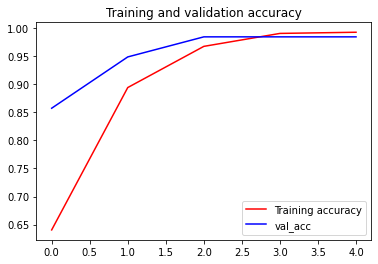

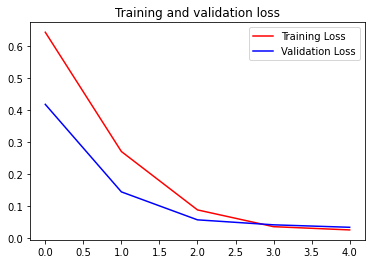

In [11]:
import matplotlib.pyplot as plt
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='val_acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()